# CTG Data Preprocessing and Cleaning

## 1. Import Required Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the CTG Dataset

In [64]:
data = pd.read_csv("CTG.csv")
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [65]:
data.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [66]:
data.shape

(2130, 40)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

In [68]:
data.describe()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857,133.303857,2.722484,7.503056,3.669017,47.008933,1.335449,9.884814,...,0.024929,0.038100,0.033866,0.156162,0.118532,0.050329,0.032455,0.092662,4.509878,1.304327
std,894.084748,930.919143,9.840844,9.840844,3.560850,39.030452,2.877148,17.210648,0.891543,18.476534,...,0.155947,0.191482,0.180928,0.363094,0.323314,0.218675,0.177248,0.290027,3.026883,0.614377
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
75%,1521.000000,2434.750000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,3296.000000,3599.000000,160.000000,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [69]:
data.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [70]:
data.duplicated().sum()

1

In [71]:
data.drop_duplicates(inplace=True)

In [72]:
columns_to_remove = ['Unnamed: 31', 'Unnamed: 42', 'Unnamed: 44']
existing_cols_to_remove = [col for col in columns_to_remove if col in data.columns]

if existing_cols_to_remove:
    data = data.drop(columns=existing_cols_to_remove)
    print(f"Removed columns: {existing_cols_to_remove}")
    print(f"New dataset shape: {data.shape}")
else:
    print("No unnamed columns found to remove")

print(f"Remaining columns: {list(data.columns)}")

No unnamed columns found to remove
Remaining columns: ['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']


## Data Analysis

Column 'LBE' statistics:
Range: 106.00 to 160.00
Mean: 133.30
Std: 9.84
Unique values: 48


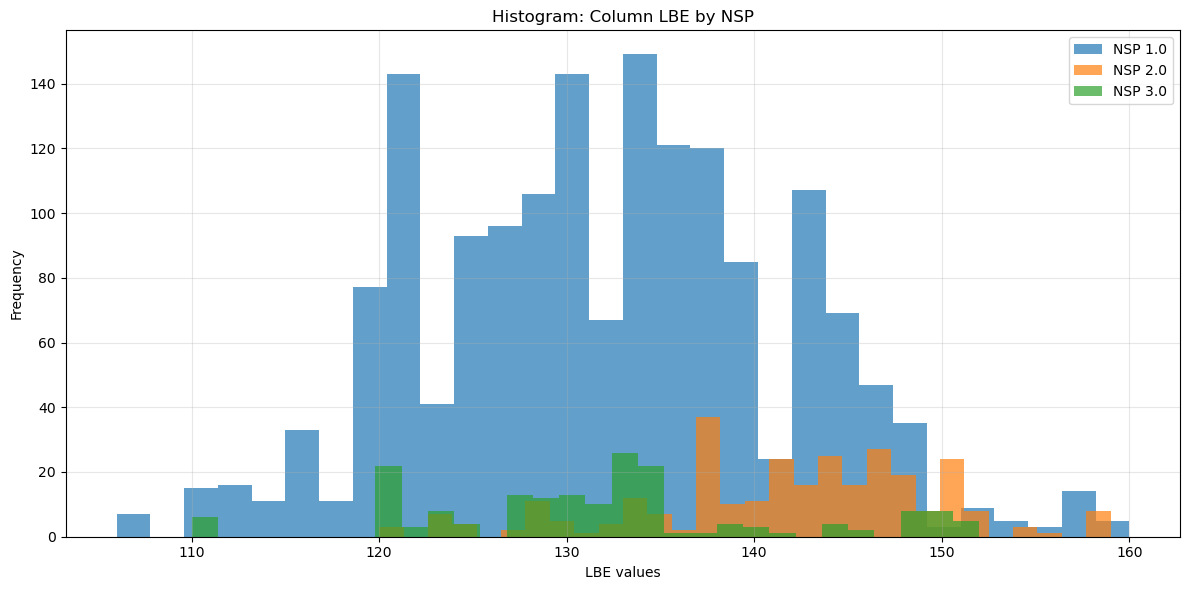


Summary statistics for column 'LBE' by NSP:
      count        mean       std    min    25%    50%    75%    max
NSP                                                                 
1.0  1655.0  131.981873  9.454513  106.0  125.0  132.0  138.0  160.0
2.0   295.0  141.684746  7.889044  120.0  137.0  143.0  147.0  159.0
3.0   176.0  131.687500  9.433016  110.0  128.0  132.0  134.0  152.0


In [73]:
if 'LBE' in data.columns and 'NSP' in data.columns:
    clean_data = data[['LBE', 'NSP']].dropna()
    
    print(f"Column 'LBE' statistics:")
    print(f"Range: {clean_data['LBE'].min():.2f} to {clean_data['LBE'].max():.2f}")
    print(f"Mean: {clean_data['LBE'].mean():.2f}")
    print(f"Std: {clean_data['LBE'].std():.2f}")
    print(f"Unique values: {clean_data['LBE'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['LBE']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column LBE by NSP')
    plt.xlabel('LBE values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'LBE' by NSP:")
    summary_stats = clean_data.groupby('NSP')['LBE'].describe()
    print(summary_stats)

Column 'LB' statistics:
Range: 106.00 to 160.00
Mean: 133.30
Std: 9.84
Unique values: 48


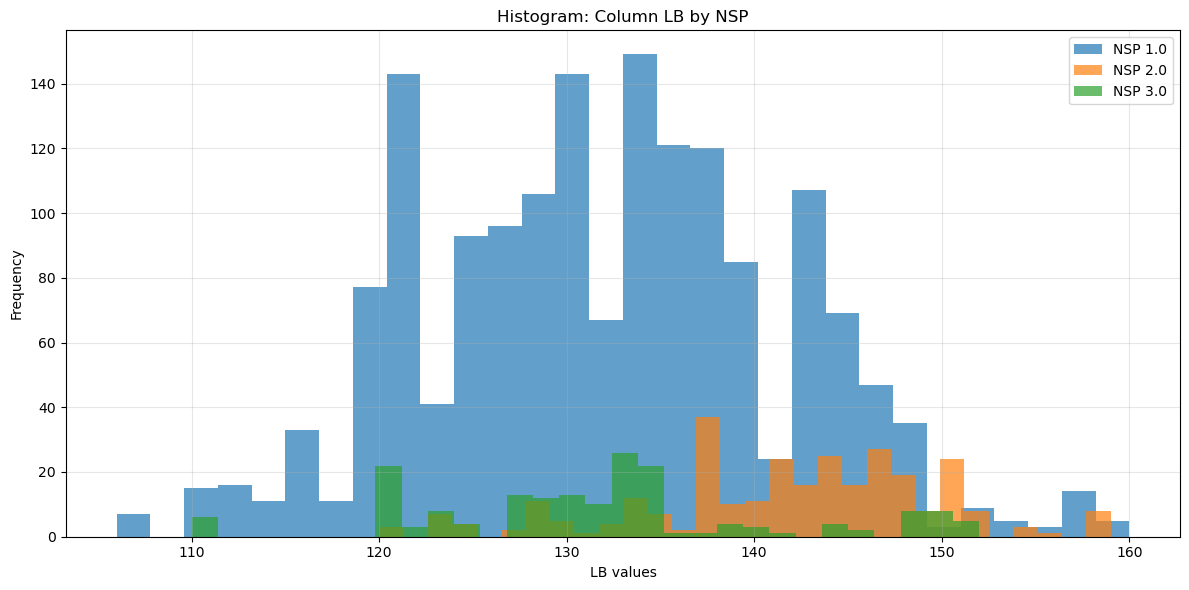


Summary statistics for column 'LB' by NSP:
      count        mean       std    min    25%    50%    75%    max
NSP                                                                 
1.0  1655.0  131.981873  9.454513  106.0  125.0  132.0  138.0  160.0
2.0   295.0  141.684746  7.889044  120.0  137.0  143.0  147.0  159.0
3.0   176.0  131.687500  9.433016  110.0  128.0  132.0  134.0  152.0


In [74]:
if 'LB' in data.columns and 'NSP' in data.columns:
    clean_data = data[['LB', 'NSP']].dropna()
    
    print(f"Column 'LB' statistics:")
    print(f"Range: {clean_data['LB'].min():.2f} to {clean_data['LB'].max():.2f}")
    print(f"Mean: {clean_data['LB'].mean():.2f}")
    print(f"Std: {clean_data['LB'].std():.2f}")
    print(f"Unique values: {clean_data['LB'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['LB']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column LB by NSP')
    plt.xlabel('LB values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'LB' by NSP:")
    summary_stats = clean_data.groupby('NSP')['LB'].describe()
    print(summary_stats)
    

Column 'AC' statistics:
Range: 0.00 to 26.00
Mean: 2.72
Std: 3.56
Unique values: 22


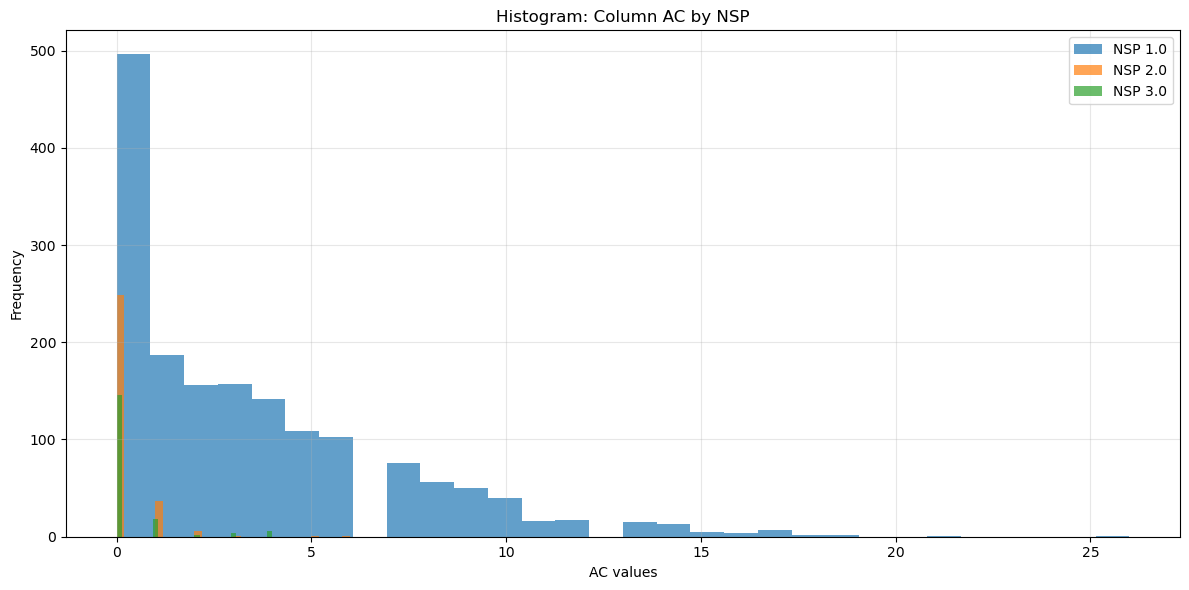


Summary statistics for column 'AC' by NSP:
      count      mean       std  min  25%  50%  75%   max
NSP                                                      
1.0  1655.0  3.424169  3.729700  0.0  0.0  2.0  5.0  26.0
2.0   295.0  0.213559  0.632310  0.0  0.0  0.0  0.0   6.0
3.0   176.0  0.329545  0.890863  0.0  0.0  0.0  0.0   4.0


In [75]:
if 'AC' in data.columns and 'NSP' in data.columns:
    clean_data = data[['AC', 'NSP']].dropna()
    
    print(f"Column 'AC' statistics:")
    print(f"Range: {clean_data['AC'].min():.2f} to {clean_data['AC'].max():.2f}")
    print(f"Mean: {clean_data['AC'].mean():.2f}")
    print(f"Std: {clean_data['AC'].std():.2f}")
    print(f"Unique values: {clean_data['AC'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['AC']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column AC by NSP')
    plt.xlabel('AC values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'AC' by NSP:")
    summary_stats = clean_data.groupby('NSP')['AC'].describe()
    print(summary_stats)
    

Column 'FM' statistics:
Range: 0.00 to 564.00
Mean: 7.24
Std: 37.13
Unique values: 96


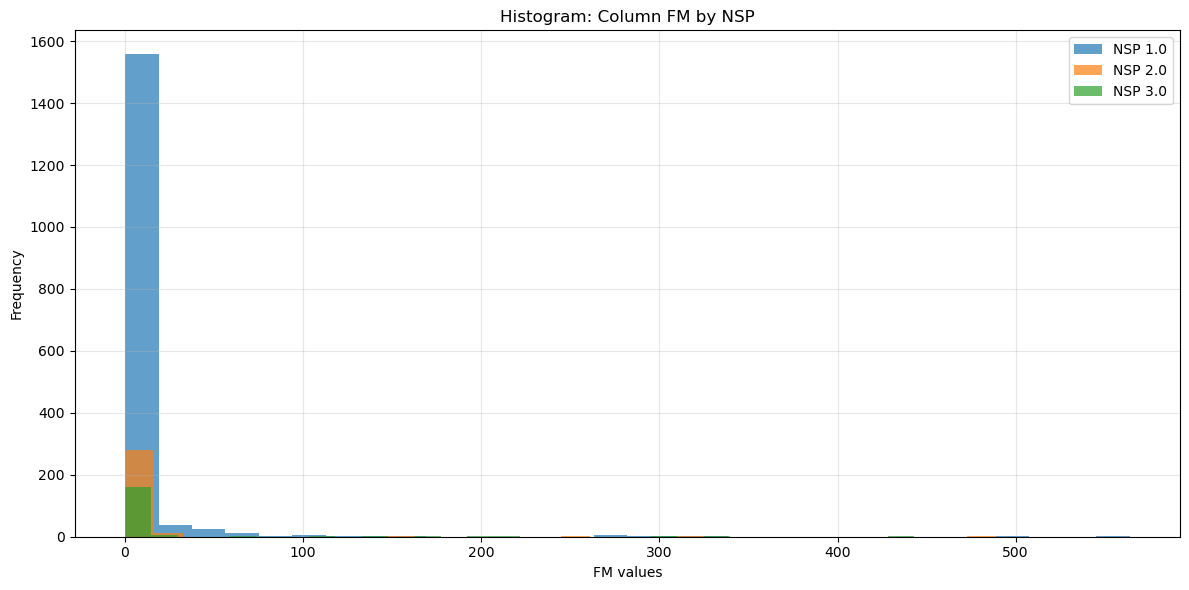


Summary statistics for column 'FM' by NSP:
      count       mean        std  min  25%  50%  75%    max
NSP                                                         
1.0  1655.0   6.370997  33.825502  0.0  0.0  0.0  2.0  564.0
2.0   295.0   7.088136  38.236274  0.0  0.0  0.0  3.0  489.0
3.0   176.0  15.681818  58.200843  0.0  0.0  1.0  2.0  443.0


In [76]:
if 'FM' in data.columns and 'NSP' in data.columns:
    clean_data = data[['FM', 'NSP']].dropna()
    
    print(f"Column 'FM' statistics:")
    print(f"Range: {clean_data['FM'].min():.2f} to {clean_data['FM'].max():.2f}")
    print(f"Mean: {clean_data['FM'].mean():.2f}")
    print(f"Std: {clean_data['FM'].std():.2f}")
    print(f"Unique values: {clean_data['FM'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['FM']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column FM by NSP')
    plt.xlabel('FM values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'FM' by NSP:")
    summary_stats = clean_data.groupby('NSP')['FM'].describe()
    print(summary_stats)
    

Column 'UC' statistics:
Range: 0.00 to 23.00
Mean: 3.66
Std: 2.85
Unique values: 19


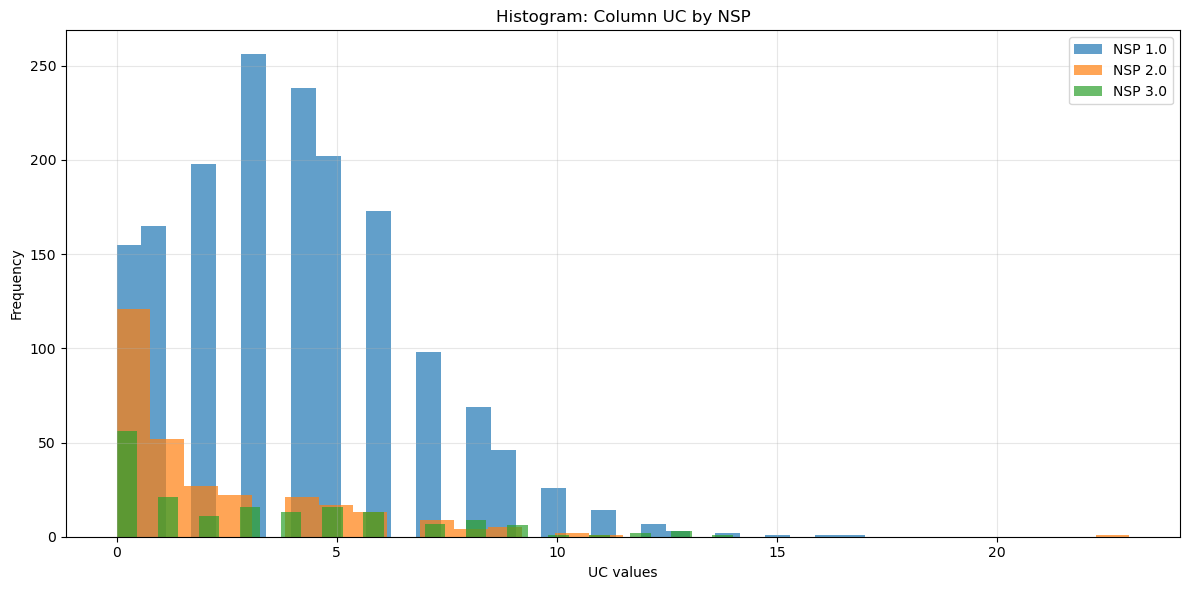


Summary statistics for column 'UC' by NSP:
      count      mean       std  min  25%  50%  75%   max
NSP                                                      
1.0  1655.0  3.984290  2.692368  0.0  2.0  4.0  6.0  17.0
2.0   295.0  2.077966  2.775749  0.0  0.0  1.0  3.0  23.0
3.0   176.0  3.261364  3.405858  0.0  0.0  2.5  5.0  14.0


In [77]:
if 'UC' in data.columns and 'NSP' in data.columns:
    clean_data = data[['UC', 'NSP']].dropna()
    
    print(f"Column 'UC' statistics:")
    print(f"Range: {clean_data['UC'].min():.2f} to {clean_data['UC'].max():.2f}")
    print(f"Mean: {clean_data['UC'].mean():.2f}")
    print(f"Std: {clean_data['UC'].std():.2f}")
    print(f"Unique values: {clean_data['UC'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['UC']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column UC by NSP')
    plt.xlabel('UC values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'UC' by NSP:")
    summary_stats = clean_data.groupby('NSP')['UC'].describe()
    print(summary_stats)
    

Column 'ASTV' statistics:
Range: 12.00 to 87.00
Mean: 46.99
Std: 17.19
Unique values: 75


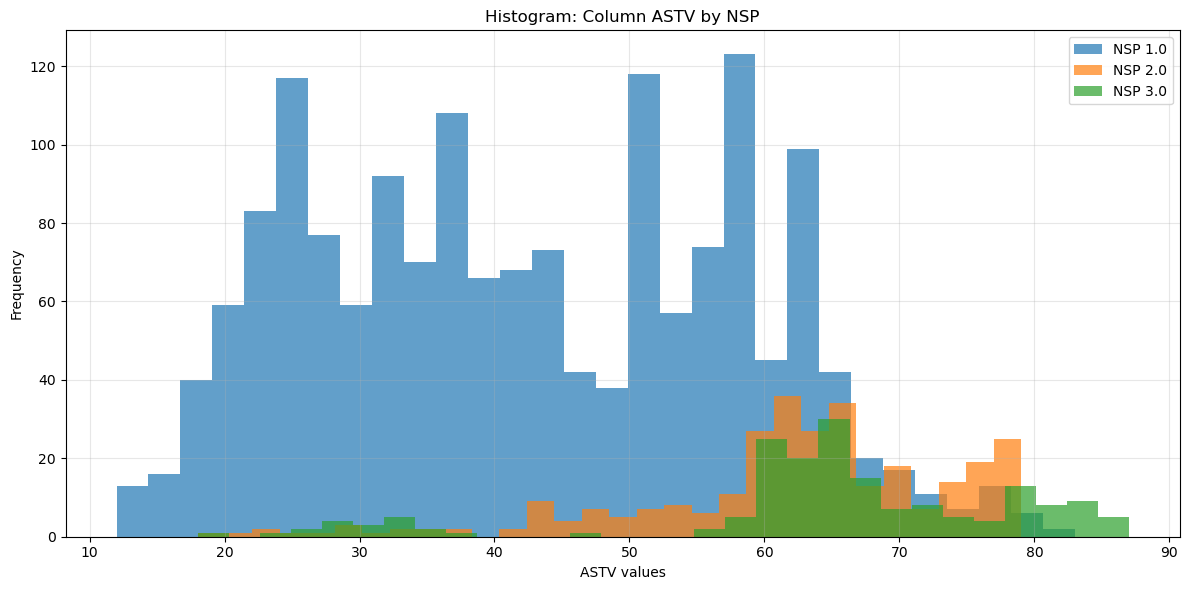


Summary statistics for column 'ASTV' by NSP:
      count       mean        std   min   25%   50%    75%   max
NSP                                                             
1.0  1655.0  42.465861  15.497354  12.0  29.0  41.0  56.00  83.0
2.0   295.0  61.901695  11.761252  18.0  58.0  63.0  69.50  79.0
3.0   176.0  64.539773  14.452231  18.0  61.0  65.0  73.25  87.0


In [78]:
if 'ASTV' in data.columns and 'NSP' in data.columns:
    clean_data = data[['ASTV', 'NSP']].dropna()
    
    print(f"Column 'ASTV' statistics:")
    print(f"Range: {clean_data['ASTV'].min():.2f} to {clean_data['ASTV'].max():.2f}")
    print(f"Mean: {clean_data['ASTV'].mean():.2f}")
    print(f"Std: {clean_data['ASTV'].std():.2f}")
    print(f"Unique values: {clean_data['ASTV'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['ASTV']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column ASTV by NSP')
    plt.xlabel('ASTV values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'ASTV' by NSP:")
    summary_stats = clean_data.groupby('NSP')['ASTV'].describe()
    print(summary_stats)
    

Column 'MSTV' statistics:
Range: 0.20 to 7.00
Mean: 1.33
Std: 0.88
Unique values: 57


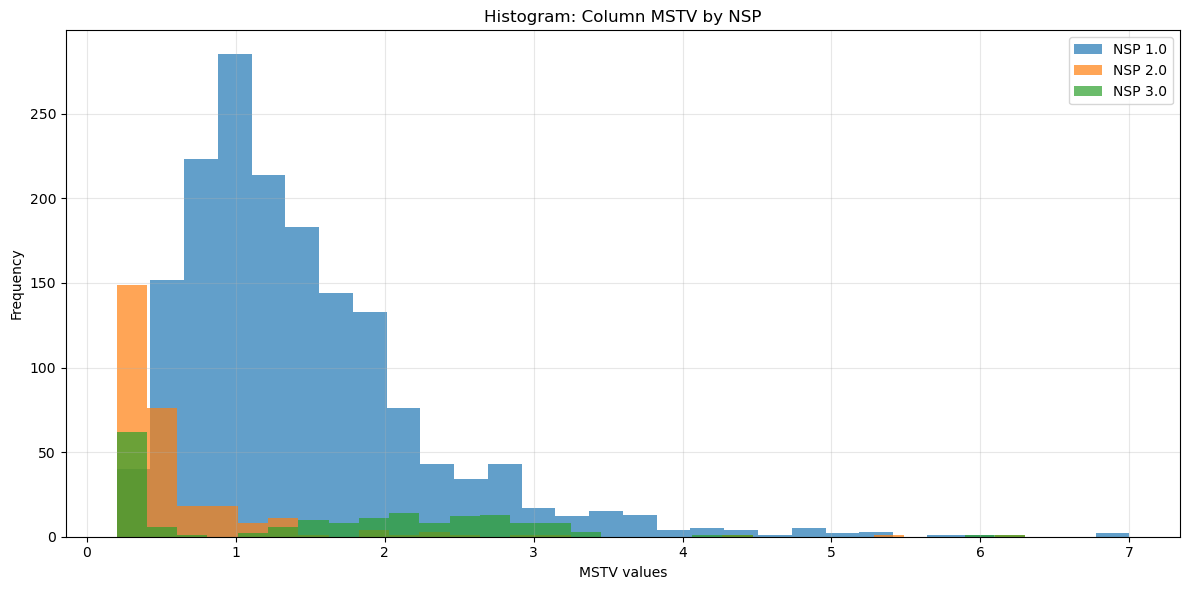


Summary statistics for column 'MSTV' by NSP:
      count      mean       std  min  25%  50%   75%  max
NSP                                                      
1.0  1655.0  1.430634  0.818955  0.2  0.8  1.3  1.75  7.0
2.0   295.0  0.638983  0.661018  0.2  0.4  0.4  0.60  6.3
3.0   176.0  1.575568  1.199393  0.2  0.3  1.7  2.50  6.3


In [79]:
if 'MSTV' in data.columns and 'NSP' in data.columns:
    clean_data = data[['MSTV', 'NSP']].dropna()
    
    print(f"Column 'MSTV' statistics:")
    print(f"Range: {clean_data['MSTV'].min():.2f} to {clean_data['MSTV'].max():.2f}")
    print(f"Mean: {clean_data['MSTV'].mean():.2f}")
    print(f"Std: {clean_data['MSTV'].std():.2f}")
    print(f"Unique values: {clean_data['MSTV'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['MSTV']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column MSTV by NSP')
    plt.xlabel('MSTV values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'MSTV' by NSP:")
    summary_stats = clean_data.groupby('NSP')['MSTV'].describe()
    print(summary_stats)

Column 'MLTV' statistics:
Range: 0.00 to 50.70
Mean: 8.19
Std: 5.63
Unique values: 249


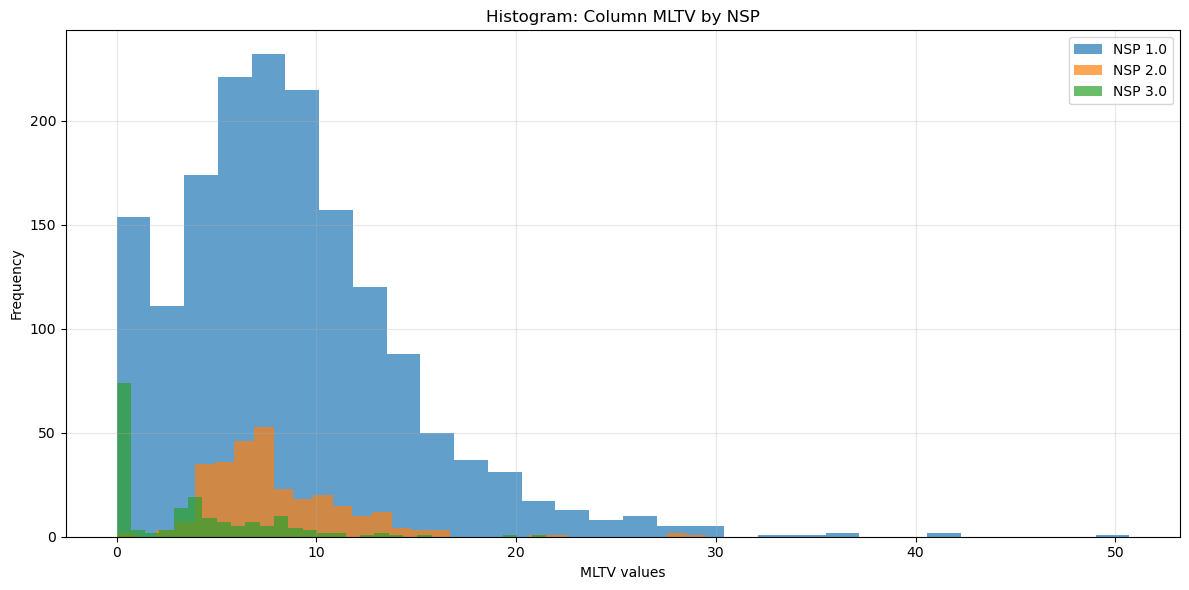


Summary statistics for column 'MLTV' by NSP:
      count      mean       std  min   25%   50%   75%   max
NSP                                                         
1.0  1655.0  8.705498  5.822163  0.0  4.85  8.00  11.5  50.7
2.0   295.0  8.026102  3.753986  0.0  5.60  7.10   9.8  29.5
3.0   176.0  3.588636  4.091886  0.0  0.00  3.25   5.8  21.5


In [80]:
if 'MLTV' in data.columns and 'NSP' in data.columns:
    clean_data = data[['MLTV', 'NSP']].dropna()
    
    print(f"Column 'MLTV' statistics:")
    print(f"Range: {clean_data['MLTV'].min():.2f} to {clean_data['MLTV'].max():.2f}")
    print(f"Mean: {clean_data['MLTV'].mean():.2f}")
    print(f"Std: {clean_data['MLTV'].std():.2f}")
    print(f"Unique values: {clean_data['MLTV'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['MLTV']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column MLTV by NSP')
    plt.xlabel('MLTV values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'MLTV' by NSP:")
    summary_stats = clean_data.groupby('NSP')['MLTV'].describe()
    print(summary_stats)

Column 'DL' statistics:
Range: 0.00 to 16.00
Mean: 1.57
Std: 2.50
Unique values: 15


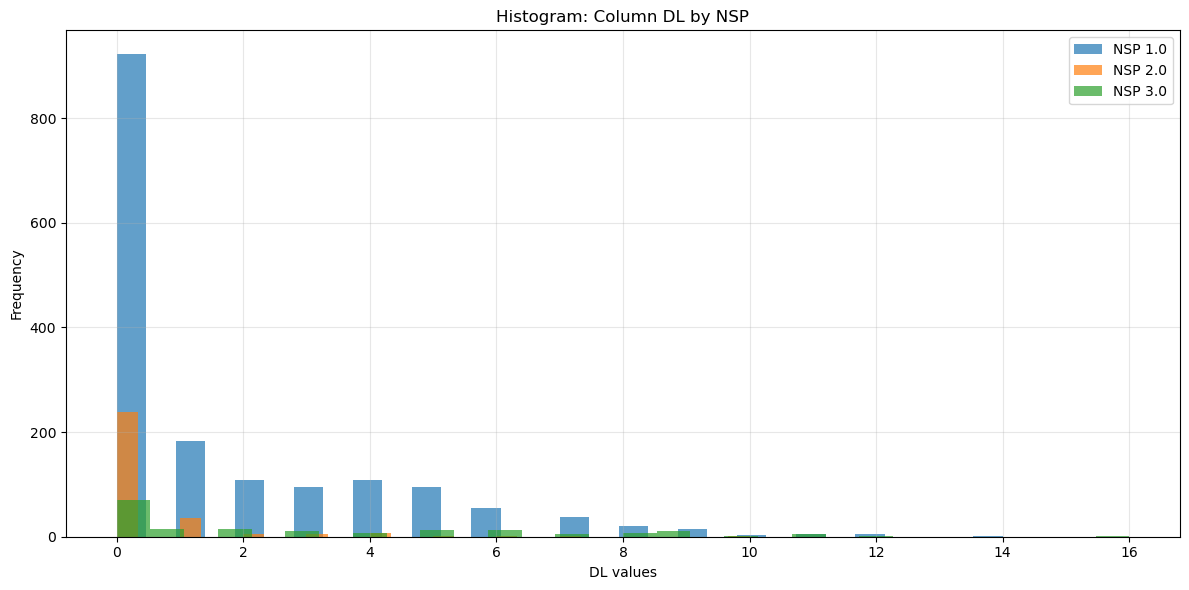


Summary statistics for column 'DL' by NSP:
      count      mean       std  min  25%  50%  75%   max
NSP                                                      
1.0  1655.0  1.609668  2.428151  0.0  0.0  0.0  3.0  14.0
2.0   295.0  0.403390  1.141363  0.0  0.0  0.0  0.0  10.0
3.0   176.0  3.153409  3.619675  0.0  0.0  2.0  6.0  16.0


In [81]:
if 'DL' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DL', 'NSP']].dropna()
    
    print(f"Column 'DL' statistics:")
    print(f"Range: {clean_data['DL'].min():.2f} to {clean_data['DL'].max():.2f}")
    print(f"Mean: {clean_data['DL'].mean():.2f}")
    print(f"Std: {clean_data['DL'].std():.2f}")
    print(f"Unique values: {clean_data['DL'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['DL']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column DL by NSP')
    plt.xlabel('DL values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'DL' by NSP:")
    summary_stats = clean_data.groupby('NSP')['DL'].describe()
    print(summary_stats)

Column 'DS' statistics:
Range: 0.00 to 1.00
Mean: 0.00
Std: 0.06
Unique values: 2


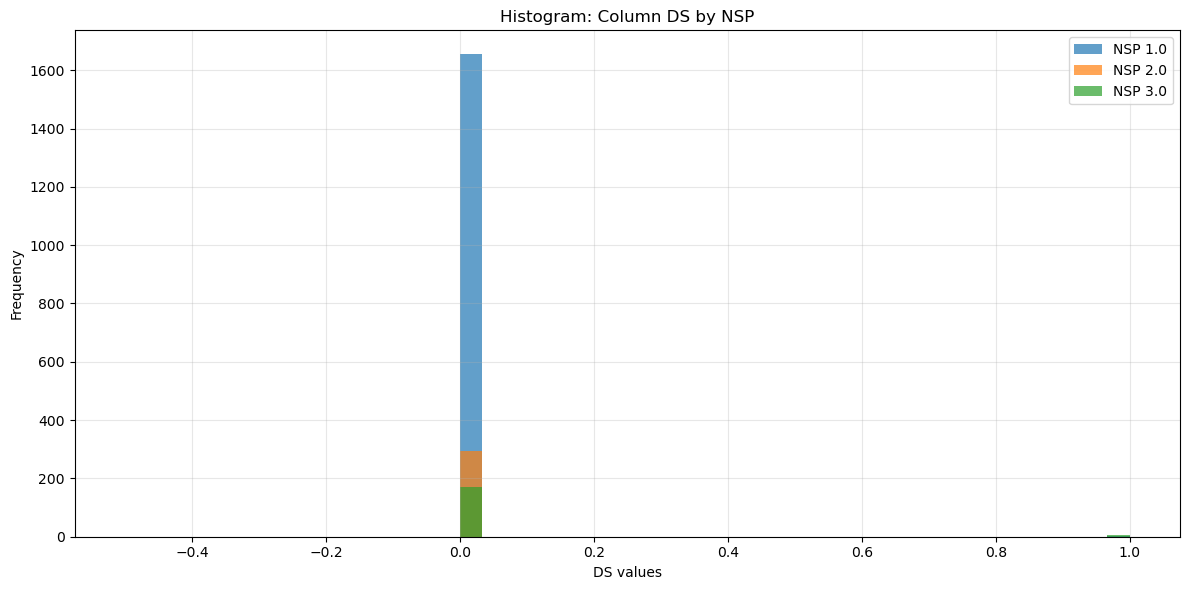


Summary statistics for column 'DS' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.000604  0.024581  0.0  0.0  0.0  0.0  1.0
2.0   295.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3.0   176.0  0.034091  0.181980  0.0  0.0  0.0  0.0  1.0


In [82]:
if 'DS' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DS', 'NSP']].dropna()
    
    print(f"Column 'DS' statistics:")
    print(f"Range: {clean_data['DS'].min():.2f} to {clean_data['DS'].max():.2f}")
    print(f"Mean: {clean_data['DS'].mean():.2f}")
    print(f"Std: {clean_data['DS'].std():.2f}")
    print(f"Unique values: {clean_data['DS'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['DS']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column DS by NSP')
    plt.xlabel('DS values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'DS' by NSP:")
    summary_stats = clean_data.groupby('NSP')['DS'].describe()
    print(summary_stats)

Column 'DP' statistics:
Range: 0.00 to 4.00
Mean: 0.13
Std: 0.46
Unique values: 5


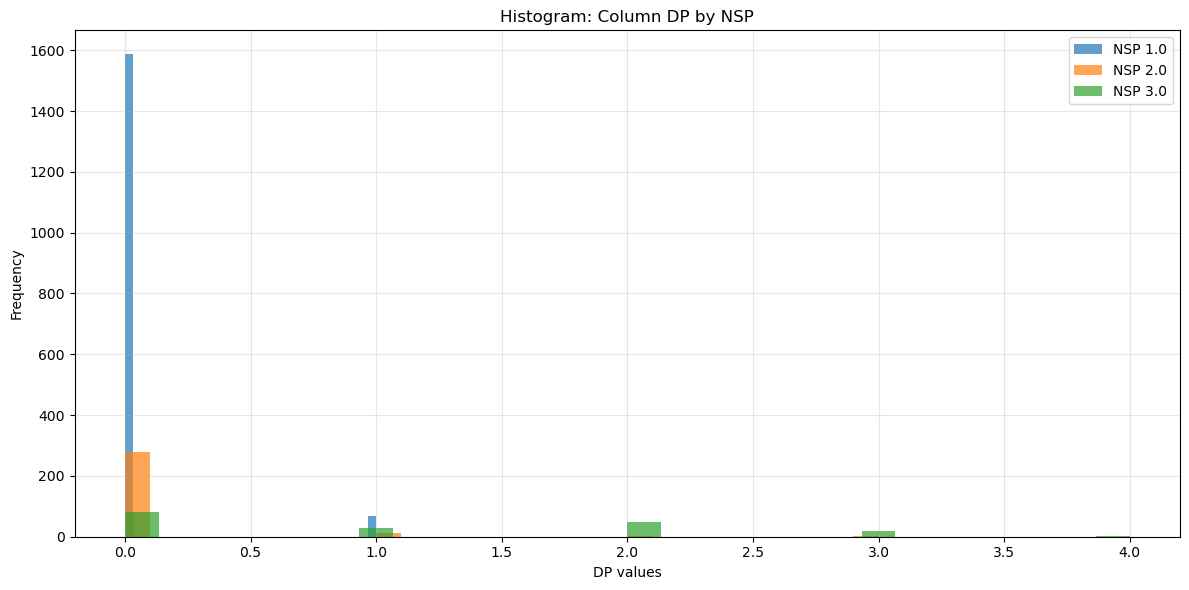


Summary statistics for column 'DP' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.041692  0.199944  0.0  0.0  0.0  0.0  1.0
2.0   295.0  0.064407  0.307371  0.0  0.0  0.0  0.0  3.0
3.0   176.0  1.022727  1.095208  0.0  0.0  1.0  2.0  4.0


In [83]:
if 'DP' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DP', 'NSP']].dropna()
    
    print(f"Column 'DP' statistics:")
    print(f"Range: {clean_data['DP'].min():.2f} to {clean_data['DP'].max():.2f}")
    print(f"Mean: {clean_data['DP'].mean():.2f}")
    print(f"Std: {clean_data['DP'].std():.2f}")
    print(f"Unique values: {clean_data['DP'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['DP']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column DP by NSP')
    plt.xlabel('DP values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'DP' by NSP:")
    summary_stats = clean_data.groupby('NSP')['DP'].describe()
    print(summary_stats)

Column 'DR' statistics:
Range: 0.00 to 0.00
Mean: 0.00
Std: 0.00
Unique values: 1


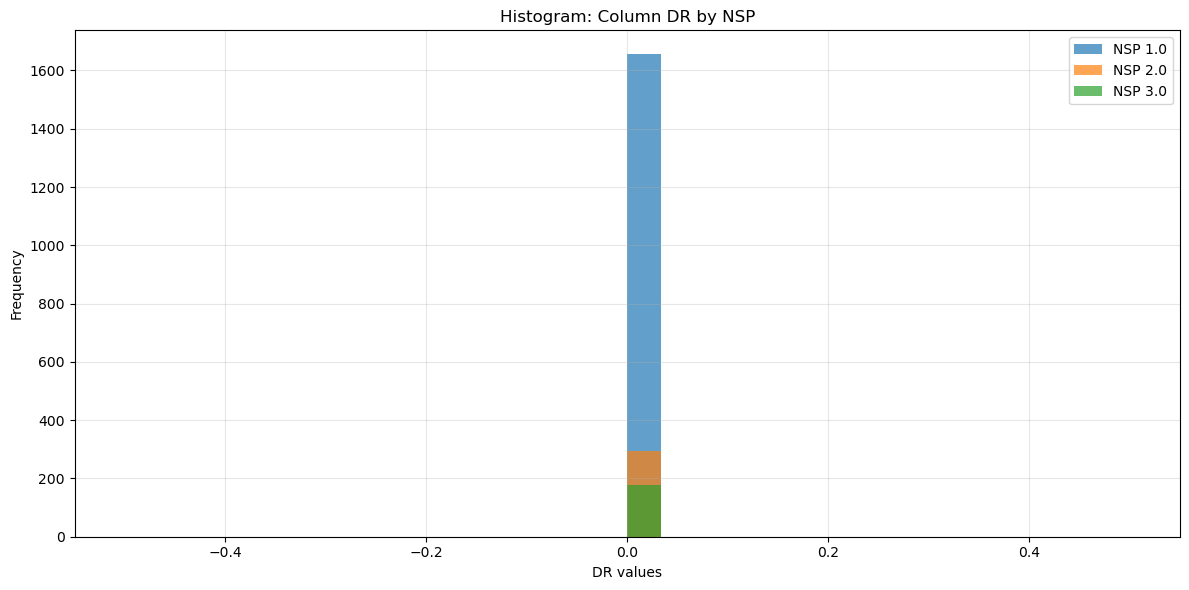


Summary statistics for column 'DR' by NSP:
      count  mean  std  min  25%  50%  75%  max
NSP                                            
1.0  1655.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2.0   295.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3.0   176.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [84]:
if 'DR' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DR', 'NSP']].dropna()
    
    print(f"Column 'DR' statistics:")
    print(f"Range: {clean_data['DR'].min():.2f} to {clean_data['DR'].max():.2f}")
    print(f"Mean: {clean_data['DR'].mean():.2f}")
    print(f"Std: {clean_data['DR'].std():.2f}")
    print(f"Unique values: {clean_data['DR'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['DR']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column DR by NSP')
    plt.xlabel('DR values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'DR' by NSP:")
    summary_stats = clean_data.groupby('NSP')['DR'].describe()
    print(summary_stats)

Column 'A' statistics:
Range: 0.00 to 1.00
Mean: 0.18
Std: 0.38
Unique values: 2


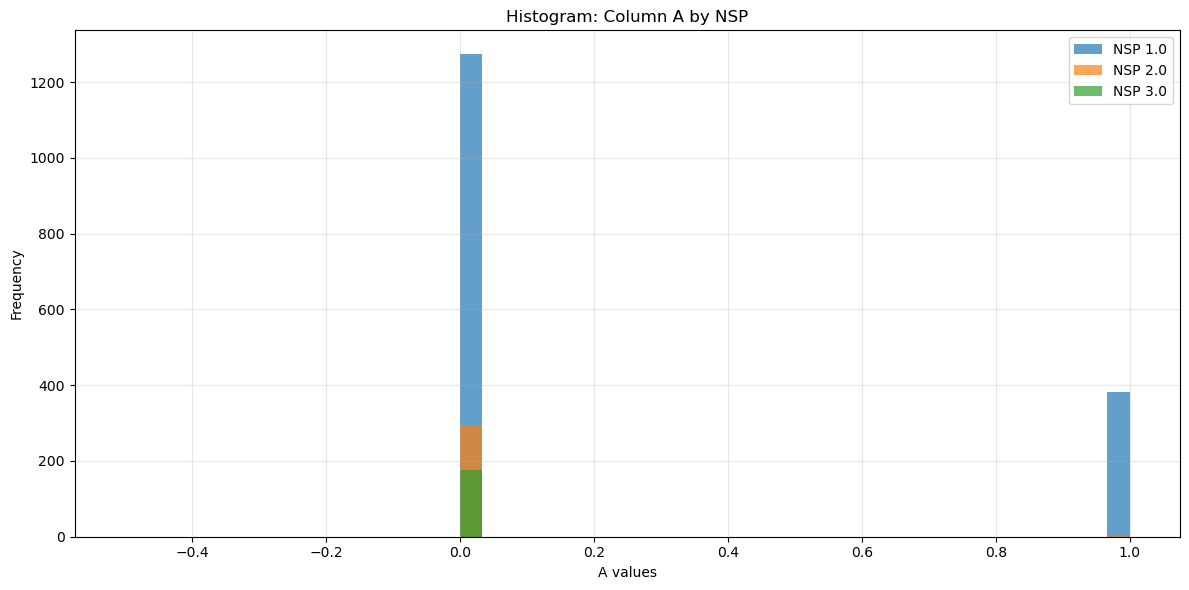


Summary statistics for column 'A' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.230816  0.421482  0.0  0.0  0.0  0.0  1.0
2.0   295.0  0.006780  0.082199  0.0  0.0  0.0  0.0  1.0
3.0   176.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


In [85]:
if 'A' in data.columns and 'NSP' in data.columns:
    clean_data = data[['A', 'NSP']].dropna()
    
    print(f"Column 'A' statistics:")
    print(f"Range: {clean_data['A'].min():.2f} to {clean_data['A'].max():.2f}")
    print(f"Mean: {clean_data['A'].mean():.2f}")
    print(f"Std: {clean_data['A'].std():.2f}")
    print(f"Unique values: {clean_data['A'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['A']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column A by NSP')
    plt.xlabel('A values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'A' by NSP:")
    summary_stats = clean_data.groupby('NSP')['A'].describe()
    print(summary_stats)

Column 'B' statistics:
Range: 0.00 to 1.00
Mean: 0.27
Std: 0.45
Unique values: 2


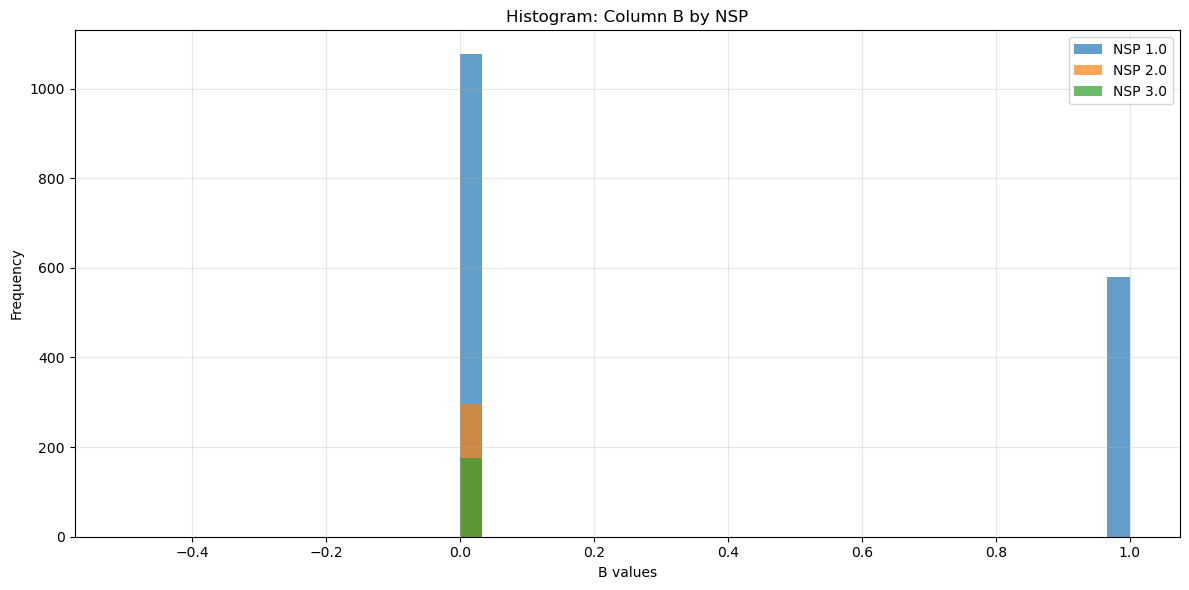


Summary statistics for column 'B' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.349849  0.477066  0.0  0.0  0.0  1.0  1.0
2.0   295.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3.0   176.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


In [86]:
if 'B' in data.columns and 'NSP' in data.columns:
    clean_data = data[['B', 'NSP']].dropna()
    
    print(f"Column 'B' statistics:")
    print(f"Range: {clean_data['B'].min():.2f} to {clean_data['B'].max():.2f}")
    print(f"Mean: {clean_data['B'].mean():.2f}")
    print(f"Std: {clean_data['B'].std():.2f}")
    print(f"Unique values: {clean_data['B'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['B']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column B by NSP')
    plt.xlabel('B values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'B' by NSP:")
    summary_stats = clean_data.groupby('NSP')['B'].describe()
    print(summary_stats)

Column 'C' statistics:
Range: 0.00 to 1.00
Mean: 0.02
Std: 0.16
Unique values: 2


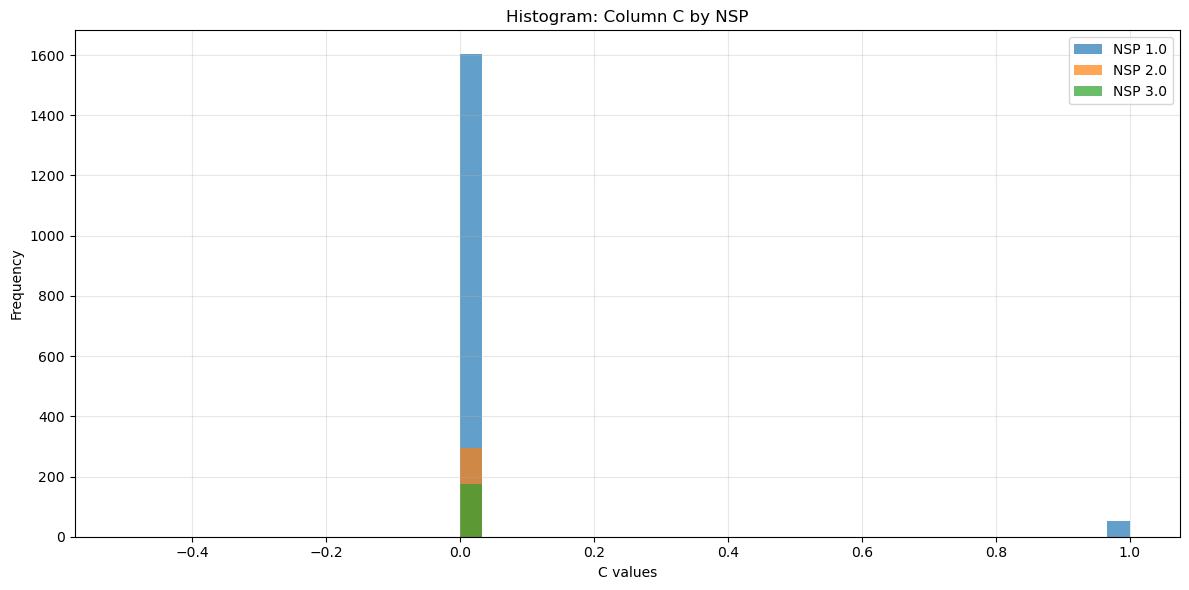


Summary statistics for column 'C' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.032024  0.176117  0.0  0.0  0.0  0.0  1.0
2.0   295.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3.0   176.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


In [87]:
if 'C' in data.columns and 'NSP' in data.columns:
    clean_data = data[['C', 'NSP']].dropna()
    
    print(f"Column 'C' statistics:")
    print(f"Range: {clean_data['C'].min():.2f} to {clean_data['C'].max():.2f}")
    print(f"Mean: {clean_data['C'].mean():.2f}")
    print(f"Std: {clean_data['C'].std():.2f}")
    print(f"Unique values: {clean_data['C'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['C']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column C by NSP')
    plt.xlabel('C values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'C' by NSP:")
    summary_stats = clean_data.groupby('NSP')['C'].describe()
    print(summary_stats)

Column 'D' statistics:
Range: 0.00 to 1.00
Mean: 0.04
Std: 0.19
Unique values: 2


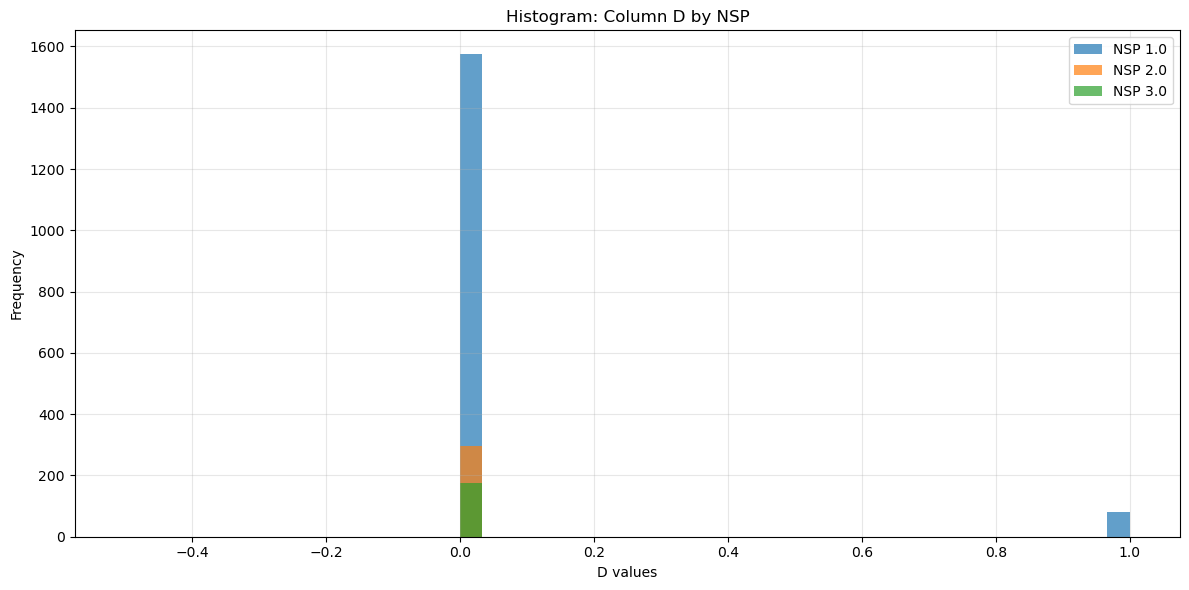


Summary statistics for column 'D' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.048943  0.215813  0.0  0.0  0.0  0.0  1.0
2.0   295.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3.0   176.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


In [88]:
if 'D' in data.columns and 'NSP' in data.columns:
    clean_data = data[['D', 'NSP']].dropna()
    
    print(f"Column 'D' statistics:")
    print(f"Range: {clean_data['D'].min():.2f} to {clean_data['D'].max():.2f}")
    print(f"Mean: {clean_data['D'].mean():.2f}")
    print(f"Std: {clean_data['D'].std():.2f}")
    print(f"Unique values: {clean_data['D'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['D']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column D by NSP')
    plt.xlabel('D values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'D' by NSP:")
    summary_stats = clean_data.groupby('NSP')['D'].describe()
    print(summary_stats)

In [89]:
if 'SH' in data.columns and 'NSP' in data.columns:
    clean_data = data[['SH', 'NSP']].dropna()
    
    print(f"Column 'SH' statistics:")
    print(f"Range: {clean_data['SH'].min():.2f} to {clean_data['SH'].max():.2f}")
    print(f"Mean: {clean_data['SH'].mean():.2f}")
    print(f"Std: {clean_data['SH'].std():.2f}")
    print(f"Unique values: {clean_data['SH'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['SH']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column SH by NSP')
    plt.xlabel('SH values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'SH' by NSP:")
    summary_stats = clean_data.groupby('NSP')['SH'].describe()
    print(summary_stats)

Column 'AD' statistics:
Range: 0.00 to 1.00
Mean: 0.16
Std: 0.36
Unique values: 2


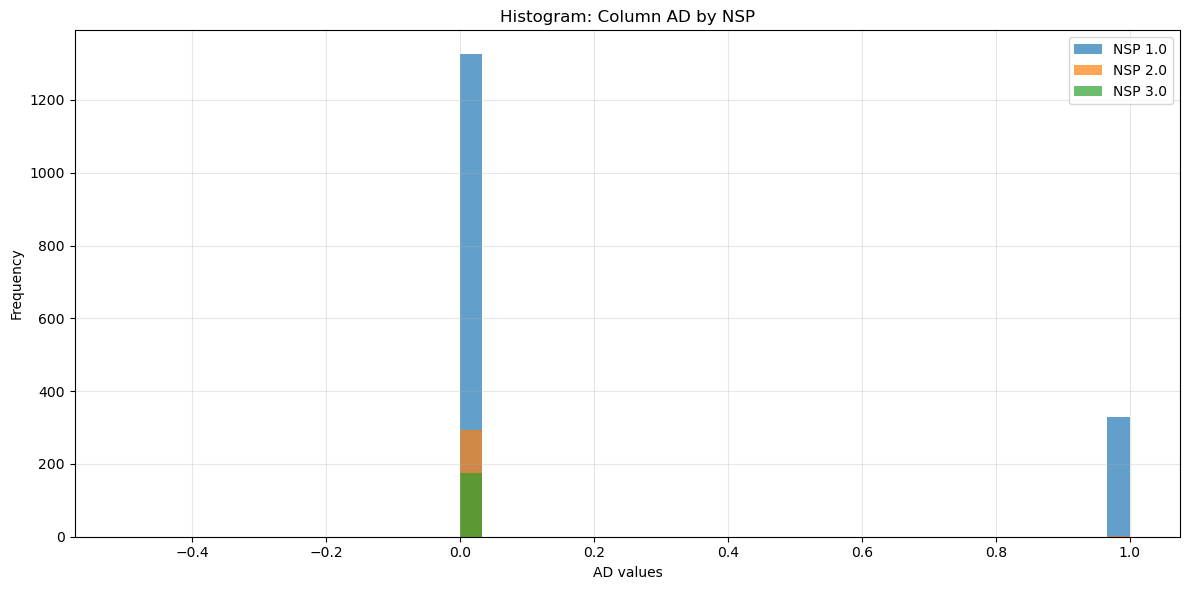


Summary statistics for column 'AD' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.199396  0.399667  0.0  0.0  0.0  0.0  1.0
2.0   295.0  0.006780  0.082199  0.0  0.0  0.0  0.0  1.0
3.0   176.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


In [90]:
if 'AD' in data.columns and 'NSP' in data.columns:
    clean_data = data[['AD', 'NSP']].dropna()
    
    print(f"Column 'AD' statistics:")
    print(f"Range: {clean_data['AD'].min():.2f} to {clean_data['AD'].max():.2f}")
    print(f"Mean: {clean_data['AD'].mean():.2f}")
    print(f"Std: {clean_data['AD'].std():.2f}")
    print(f"Unique values: {clean_data['AD'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['AD']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column AD by NSP')
    plt.xlabel('AD values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'AD' by NSP:")
    summary_stats = clean_data.groupby('NSP')['AD'].describe()
    print(summary_stats)

Column 'DE' statistics:
Range: 0.00 to 1.00
Mean: 0.12
Std: 0.32
Unique values: 2


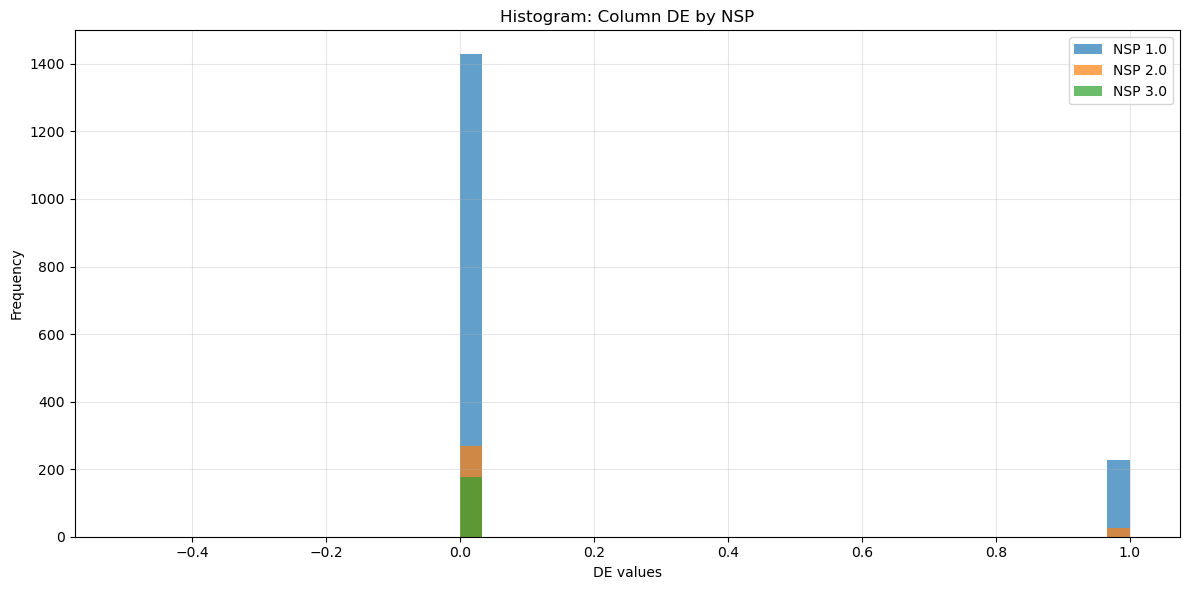


Summary statistics for column 'DE' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.137160  0.344120  0.0  0.0  0.0  0.0  1.0
2.0   295.0  0.084746  0.278976  0.0  0.0  0.0  0.0  1.0
3.0   176.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0


In [91]:
if 'DE' in data.columns and 'NSP' in data.columns:
    clean_data = data[['DE', 'NSP']].dropna()
    
    print(f"Column 'DE' statistics:")
    print(f"Range: {clean_data['DE'].min():.2f} to {clean_data['DE'].max():.2f}")
    print(f"Mean: {clean_data['DE'].mean():.2f}")
    print(f"Std: {clean_data['DE'].std():.2f}")
    print(f"Unique values: {clean_data['DE'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['DE']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column DE by NSP')
    plt.xlabel('DE values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'DE' by NSP:")
    summary_stats = clean_data.groupby('NSP')['DE'].describe()
    print(summary_stats)

Column 'LD' statistics:
Range: 0.00 to 1.00
Mean: 0.05
Std: 0.22
Unique values: 2


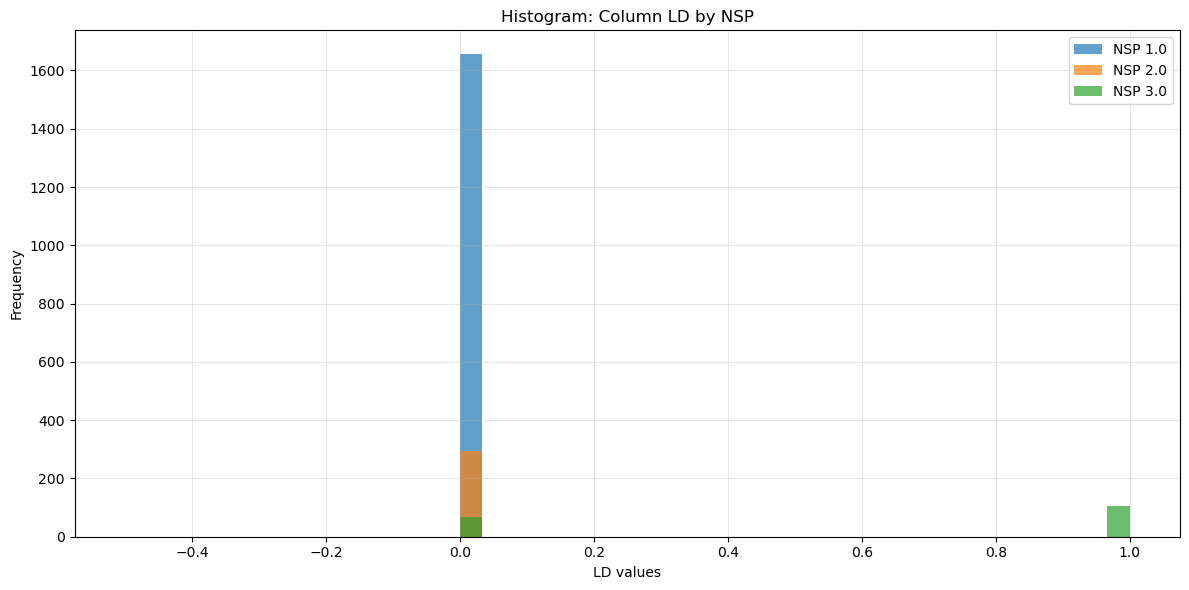


Summary statistics for column 'LD' by NSP:
      count      mean     std  min  25%  50%  75%  max
NSP                                                   
1.0  1655.0  0.000000  0.0000  0.0  0.0  0.0  0.0  0.0
2.0   295.0  0.000000  0.0000  0.0  0.0  0.0  0.0  0.0
3.0   176.0  0.607955  0.4896  0.0  0.0  1.0  1.0  1.0


In [92]:
if 'LD' in data.columns and 'NSP' in data.columns:
    clean_data = data[['LD', 'NSP']].dropna()
    
    print(f"Column 'LD' statistics:")
    print(f"Range: {clean_data['LD'].min():.2f} to {clean_data['LD'].max():.2f}")
    print(f"Mean: {clean_data['LD'].mean():.2f}")
    print(f"Std: {clean_data['LD'].std():.2f}")
    print(f"Unique values: {clean_data['LD'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['LD']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column LD by NSP')
    plt.xlabel('LD values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'LD' by NSP:")
    summary_stats = clean_data.groupby('NSP')['LD'].describe()
    print(summary_stats)

Column 'FS' statistics:
Range: 0.00 to 1.00
Mean: 0.03
Std: 0.18
Unique values: 2


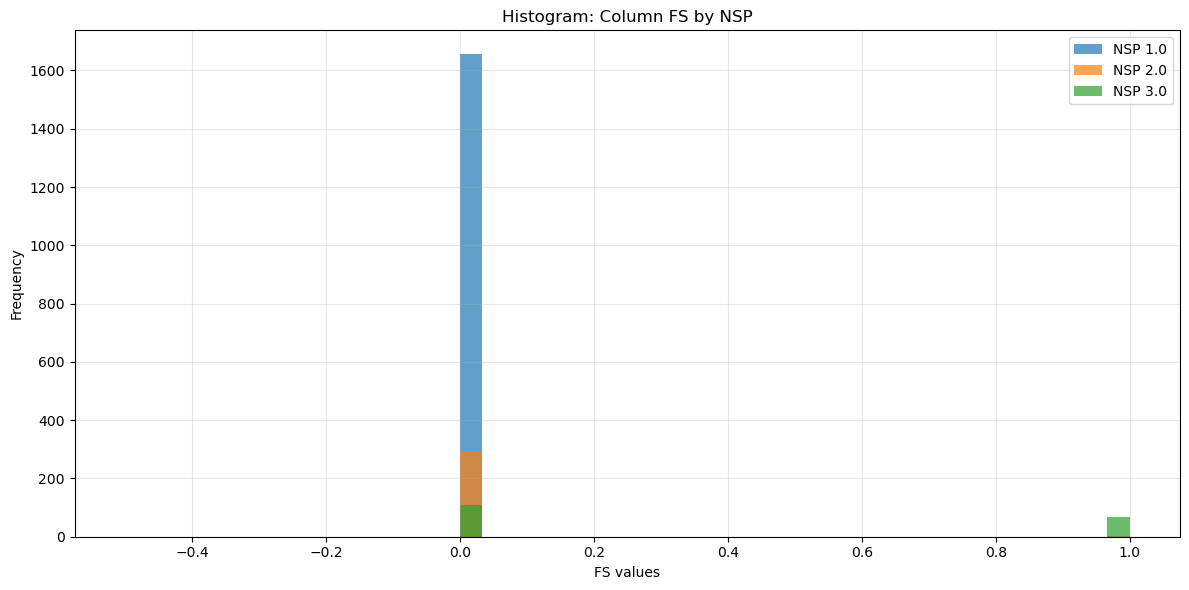


Summary statistics for column 'FS' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2.0   295.0  0.003390  0.058222  0.0  0.0  0.0  0.0  1.0
3.0   176.0  0.386364  0.488305  0.0  0.0  0.0  1.0  1.0


In [93]:
if 'FS' in data.columns and 'NSP' in data.columns:
    clean_data = data[['FS', 'NSP']].dropna()
    
    print(f"Column 'FS' statistics:")
    print(f"Range: {clean_data['FS'].min():.2f} to {clean_data['FS'].max():.2f}")
    print(f"Mean: {clean_data['FS'].mean():.2f}")
    print(f"Std: {clean_data['FS'].std():.2f}")
    print(f"Unique values: {clean_data['FS'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['FS']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column FS by NSP')
    plt.xlabel('FS values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'FS' by NSP:")
    summary_stats = clean_data.groupby('NSP')['FS'].describe()
    print(summary_stats)

Column 'SUSP' statistics:
Range: 0.00 to 1.00
Mean: 0.09
Std: 0.29
Unique values: 2


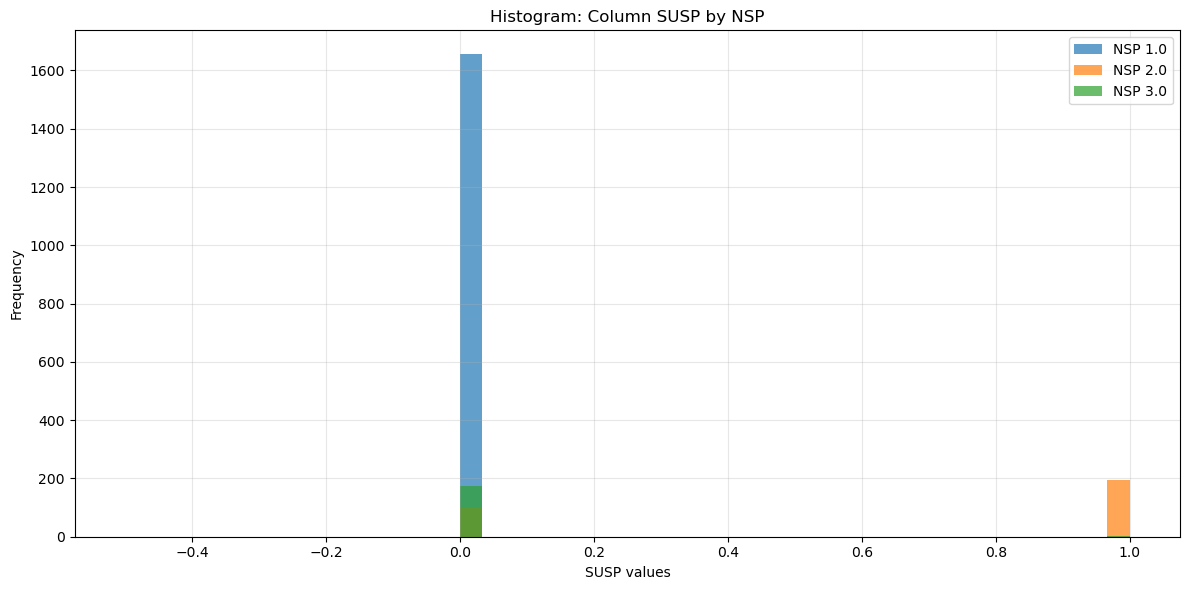


Summary statistics for column 'SUSP' by NSP:
      count      mean       std  min  25%  50%  75%  max
NSP                                                     
1.0  1655.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
2.0   295.0  0.664407  0.473000  0.0  0.0  1.0  1.0  1.0
3.0   176.0  0.005682  0.075378  0.0  0.0  0.0  0.0  1.0


In [94]:
if 'SUSP' in data.columns and 'NSP' in data.columns:
    clean_data = data[['SUSP', 'NSP']].dropna()
    
    print(f"Column 'SUSP' statistics:")
    print(f"Range: {clean_data['SUSP'].min():.2f} to {clean_data['SUSP'].max():.2f}")
    print(f"Mean: {clean_data['SUSP'].mean():.2f}")
    print(f"Std: {clean_data['SUSP'].std():.2f}")
    print(f"Unique values: {clean_data['SUSP'].nunique()}")
    
    plt.figure(figsize=(12, 6))
    
    for nsp_val in sorted(clean_data['NSP'].unique()):
        subset = clean_data[clean_data['NSP'] == nsp_val]['SUSP']
        plt.hist(subset, alpha=0.7, label=f'NSP {nsp_val}', bins=30)
    
    plt.title('Histogram: Column SUSP by NSP')
    plt.xlabel('SUSP values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nSummary statistics for column 'SUSP' by NSP:")
    summary_stats = clean_data.groupby('NSP')['SUSP'].describe()
    print(summary_stats)